## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [112]:
#Se cargan todas las librerias necesarias
import pandas as pd  
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [4]:
#Cargar los datos
Datos = pd.read_csv('Mall_Customers.csv')

In [6]:
#Inspeccionar los datos
Datos.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [20]:
# Descripción de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

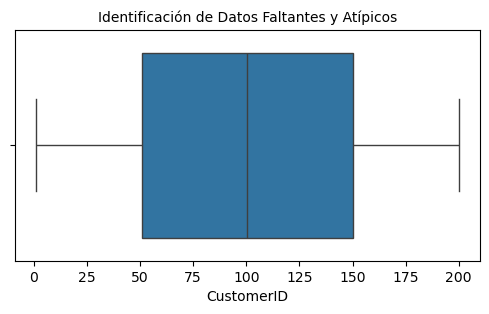

In [8]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['CustomerID'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [10]:
#Revisión de datos faltantes
print("Cantidad de Registros con cero en Nivel de Glucosa: ",Datos['CustomerID'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión Arterial: ",Datos['Gender'].isin([0]).sum())
print("Cantidad de Registros con cero en Grosor Piel: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel Insulina: ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en IMC: ",Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de Glucosa:  0
Cantidad de Registros con cero en Presión Arterial:  0
Cantidad de Registros con cero en Grosor Piel:  0
Cantidad de Registros con cero en Nivel Insulina:  0
Cantidad de Registros con cero en IMC:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

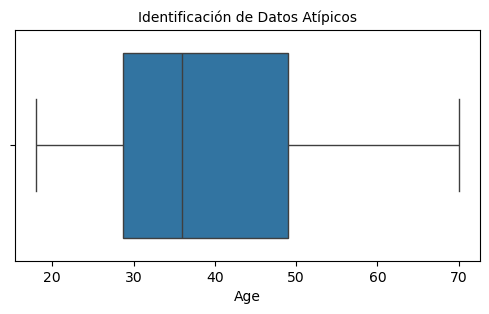

In [12]:
#Identificación de Datos Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [14]:
#Conteo de Datos Atípicos
nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Datos['CustomerID']<nivel_minimo)|(Datos['CustomerID']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 19


In [16]:
# Filtra Datos Atípicos
Datos=Datos[(Datos['CustomerID']<nivel_maximo)&(Datos['CustomerID']>nivel_minimo)]

In [18]:
# Validar si se removieron los datos atípicos
Total_Atipicos=((Datos['CustomerID']<nivel_minimo)|(Datos['CustomerID']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [20]:
#Revisión del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 20 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              180 non-null    int64 
 1   Gender                  180 non-null    object
 2   Age                     180 non-null    int64 
 3   Annual Income (k$)      180 non-null    int64 
 4   Spending Score (1-100)  180 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.4+ KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [116]:
# Total de los generos presentes
Datos['Gender'].value_counts()

Gender
Female    100
Male       80
Name: count, dtype: int64

In [118]:
Datos[['Gender']].head(20)

,Gender
20,Male
21,Male
22,Female
23,Male
24,Female
25,Male
26,Female
27,Male
28,Female
29,Female


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [120]:
# Porcentaje de datos para entrenamiento (train) = 60% , y para prueba (test) = 40%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Gender',axis=1) # Se cargan los datos de train sin los datos de la columna Gender
Y = Datos['Gender'] # Se cargan los datos de train con los datos de la la columna Annual Gender

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=0)

In [122]:
print (X_train)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
117         118   49                  65                      59
118         119   51                  67                      43
63           64   54                  47                      59
30           31   60                  30                       4
106         107   66                  63                      50
..          ...  ...                 ...                     ...
123         124   39                  69                      91
87           88   22                  57                      55
137         138   32                  73                      73
67           68   68                  48                      48
192         193   33                 113                       8

[108 rows x 4 columns]


In [124]:
print (Y_train)

117    Female
118    Female
63     Female
30       Male
106    Female
        ...  
123      Male
87     Female
137      Male
67     Female
192      Male
Name: Gender, Length: 108, dtype: object


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [126]:
# Construir el modelo de regresión logística 
modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [132]:
print (Y_test)

126      Male
27       Male
145      Male
180    Female
156      Male
        ...  
196    Female
109      Male
82       Male
22     Female
79     Female
Name: Gender, Length: 72, dtype: object


In [130]:
print (Prediccion)

['Female' 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Male' 'Female' 'Female' 'Female' 'Female' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Male' 'Female' 'Female' 'Male' 'Female']


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [134]:
# Desempeño del modelo de regresión
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

      Female       0.45      0.72      0.55        36
        Male       0.29      0.11      0.16        36

    accuracy                           0.42        72
   macro avg       0.37      0.42      0.36        72
weighted avg       0.37      0.42      0.36        72



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

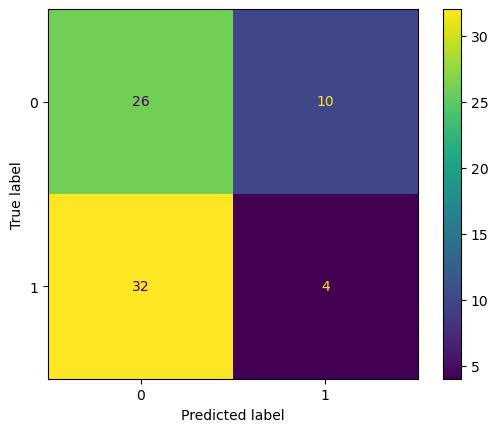

In [136]:
#Matrix de Confusión del modelo
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

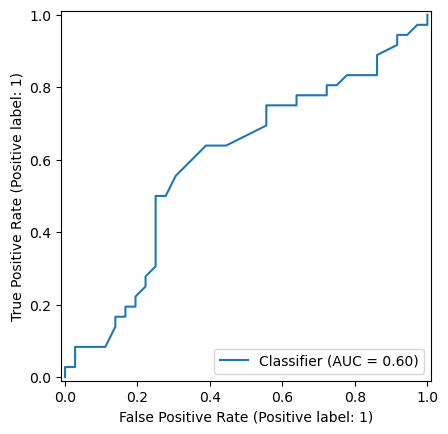

In [138]:
# Convertir las columnas de 'Male' y 'Female' a 0 y 1
le = LabelEncoder()
Y_test_encoded = le.fit_transform(Y_test)

# Crear y entrenar un modelo de clasificación (RandomForest en este caso)
modelo = RandomForestClassifier(random_state=0)
modelo.fit(X_train, Y_train)  # Asegúrate de que X_train y Y_train estén definidos

# Obtener las probabilidades de la clase positiva (1)
Prediccion_probabilidad = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva (Male)

# Generar la curva ROC usando las probabilidades de la clase positiva
RocCurveDisplay.from_predictions(Y_test_encoded, Prediccion_probabilidad)
plt.show()